In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('yelp_user.csv')
df.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [3]:
print(df.shape)
df.columns

(1326100, 22)


Index(['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful',
       'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [4]:
# Cleaning up dataset to remove outliers and reduce the size for computation
df = df[['user_id', 'review_count', 'friends', 'fans']]
df = df.iloc[0:10000,:]
df = df[df['review_count']<200]
df.shape

(9593, 4)

In [5]:
df['review_count'].describe()

count    9593.000000
mean       19.659126
std        33.474741
min         0.000000
25%         2.000000
50%         6.000000
75%        20.000000
max       199.000000
Name: review_count, dtype: float64

In [6]:
df['review_count'].describe()
df[['review_count']].head()

,review_count
0,10
1,1
2,6
3,3
4,11


In [7]:
df['friends_ct'] = df['friends'].apply(lambda x: len(x.split(',')))
df[['friends','friends_ct']].head(10)

,friends,friends_ct
0,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",79
1,None,1
2,None,1
3,None,1
4,None,1
5,None,1
6,None,1
7,None,1
8,None,1
9,None,1


(0, 80)

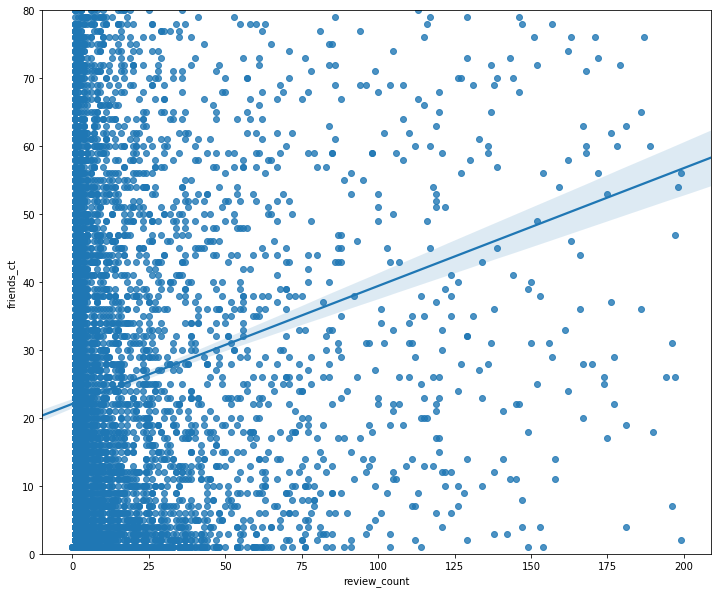

In [8]:
df_chunk = df[df['friends_ct']<100]
plt.figure(figsize=(12, 10))
sns.regplot(x = 'review_count', y='friends_ct', data=df_chunk)
plt.ylim(0,80)

In [9]:
df.sort_values(by='review_count', inplace=True)
df['cum_review_ct'] = df['review_count'].cumsum()
df[['review_count', 'cum_review_ct']].tail()

,review_count,cum_review_ct
1610,198,187795
5856,198,187993
5874,199,188192
3498,199,188391
4309,199,188590


In [10]:
total_reviews = df['review_count'].sum()
df['cum_review_percent'] = df['cum_review_ct']/total_reviews * 100

In [11]:
df.reset_index(inplace=True)

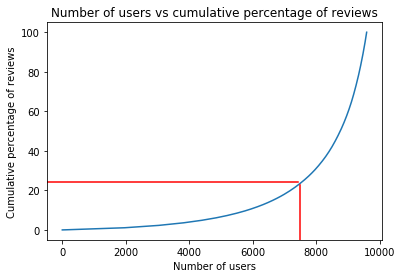

In [12]:
s = df['cum_review_percent']
plt.plot(s.index, s.values)
plt.xlabel('Number of users')
plt.ylabel('Cumulative percentage of reviews')
plt.title('Number of users vs cumulative percentage of reviews')
plt.axvline(x=7500, ymax=0.25, color='r')
plt.axhline(y=24 , xmax = 0.75, color='r')

plt.show()

#### The plot above shows that 25% of the reviewers have written 75% of the reviews.